# K-means Clustering Practice

## Introduce

Data of Mall Customers include `CustomerID`, `Genre`, `Age`, `Annual Income`, `Spending Score`

- `Spending Score` value between 1-100 points: how much each customer spent.

Task:

Clustering types of customers. Create a dependent variable.

## Import the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset

In [13]:
dataset = pd.read_csv('../data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# just take features are needed for clustering
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Visualize Relation of `Annual Income` and `Spending Score`

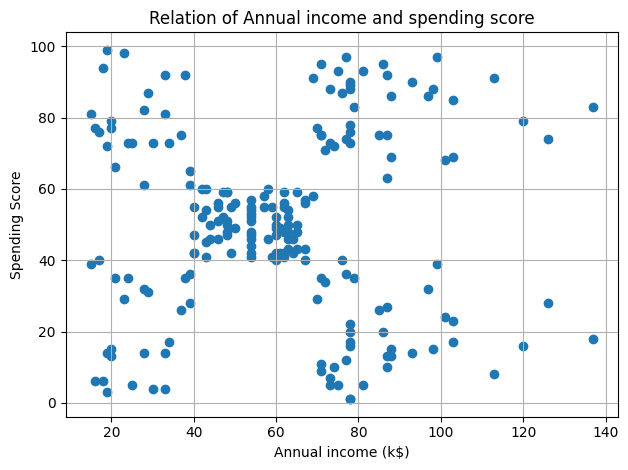

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('Relation of Annual income and spending score')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Using the Elbow Method to fine the optimal number of clusters

Reminder fomular:
$$WCSS = \sum_{P_{i} \text{ in Cluster 1}} \text{distance}(P_{i}, C_{1})^2 + \sum_{P_{i} \text{ in Cluster 2}} \text{distance}(P_{i}, C_{2})^2 + \dots$$

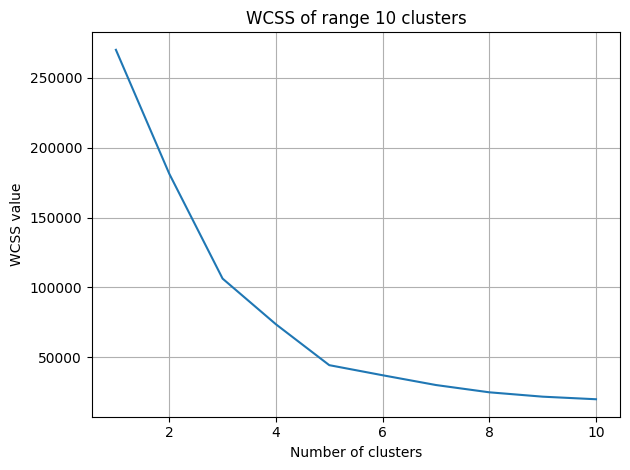

In [16]:
from sklearn.cluster import KMeans
wcss = []
# loop for range 1->10 clusters
for K in range(1, 11):
    kmeans = KMeans(n_clusters = K, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot WCSS
plt.plot(range(1, 11), wcss)
plt.title('WCSS of range 10 clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.grid(True)
plt.tight_layout()
plt.show()

=> The optimal number of clusters is 5

## Traning the K-means model on the dataset

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
pred_labels = kmeans.fit_predict(X)

In [18]:
print(pred_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the Clusters

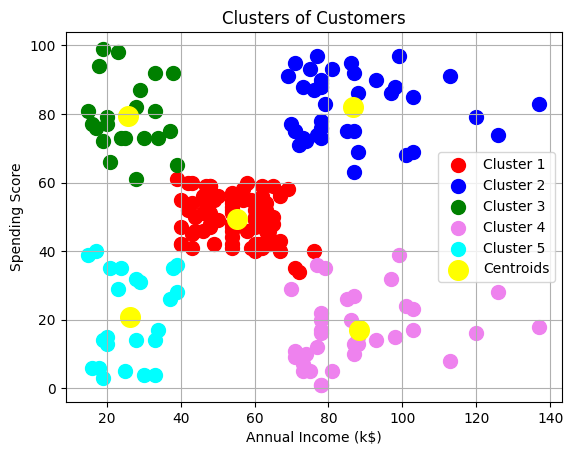

In [19]:
colors = ['red', 'blue', 'green', 'violet', 'cyan']
for i in range(0, 5):
    plt.scatter(X[pred_labels == i, 0], X[pred_labels == i, 1], s = 100, color = colors[i], label = 'Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, color = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend()
plt.show()